# Create Intermediate Raster Result

In [1]:
from datetime import datetime
import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             d9283136-c7d6-4451-9cbf-4ae5eb8b33b0
Session Id:          d14f3c6d-834a-4a49-969c-d077353fb61e
Session valid until: 2025-01-05T12:32:00.108Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": "ndvi"
        }
    }
})
workflow

0abf52bc-e7da-557b-be43-59b96b591f4a

## Query raster via WMS

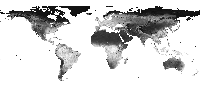

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

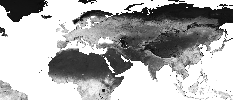

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

## Store part of the world as new dataset

In [7]:
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(
            datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z"),
            datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ).as_raster_query_rectangle_api_dict(),
    name=session.user_id+":part_ndvi",
    display_name="Part NDVI",
    description="Test Description",
)
task

TimeInterval(start=2014-04-01T12:00:00.000000, end=2014-06-01T12:00:00.000000) 1396353600000 1401624000000


UUID('d8b87f20-370e-4e81-a4d3-446894fcdf42')

In [8]:
task_status_info = task.wait_for_finish(1)
task_status_info

status=running, time_started=2024-12-06 12:32:00.321000+00:00, pct_complete=0.00%, estimated_time_remaining=? (± ?), info=None, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 0abf52bc-e7da-557b-be43-59b96b591f4a
status=completed, time_started=2024-12-06 12:32:00.321000+00:00, info={'dataset': 'd9283136-c7d6-4451-9cbf-4ae5eb8b33b0:part_ndvi', 'upload': '7287817e-8f74-4610-b542-e6ba8cb35d17'}, time_total=00:00:00, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 0abf52bc-e7da-557b-be43-59b96b591f4a


TaskStatusInfo(status='completed', time_started=datetime.datetime(2024, 12, 6, 12, 32, 0, 321000, tzinfo=datetime.timezone.utc), info = {'dataset': 'd9283136-c7d6-4451-9cbf-4ae5eb8b33b0:part_ndvi', 'upload': '7287817e-8f74-4610-b542-e6ba8cb35d17'}, time_total = '00:00:00', task_type='create-dataset', description='Creating dataset Part NDVI from workflow 0abf52bc-e7da-557b-be43-59b96b591f4a')

In [9]:
stored_dataset = ge.StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_name=d9283136-c7d6-4451-9cbf-4ae5eb8b33b0:part_ndvi, upload_id=7287817e-8f74-4610-b542-e6ba8cb35d17)

In [10]:
new_workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": str(stored_dataset.dataset_name)
        }
    }
})
new_workflow

d20bf558-49b8-5404-8fc1-213e2ff4522f

## WMS request from new dataset

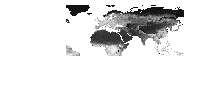

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

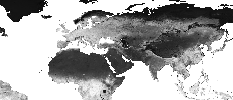

In [12]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

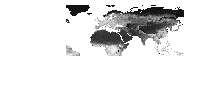

In [13]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

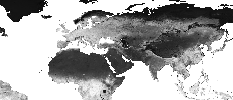

In [14]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

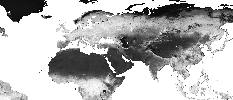

In [15]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)